In [7]:
import cv2 as cv
import os
before_dir='Before Preprocessing'
after_dir='After preprocessing'
target_size = (200, 200)
if not os.path.exists(after_dir):
    os.makedirs(after_dir)

In [9]:
def resizing_images(input_dir, after_dir):
    # Iterate through each file in the before_dir
    for filename in os.listdir(input_dir):
        filepath = os.path.join(input_dir, filename)
        if os.path.isfile(filepath) and (filename.endswith(".jpg") or filename.endswith(".png")):
            # Reading the image 
            img = cv.imread(filepath, cv.IMREAD_GRAYSCALE)

            # Resizing the image using cv.resize
            resized_img = cv.resize(img, target_size)

            # Save the resized image in the after_dir
            output_path = os.path.join(after_dir, filename)
            cv.imwrite(output_path, resized_img)
            print(f"Resized and saved: {output_path}")
        elif os.path.isdir(filepath):
            # If the current item is a directory, recursively call this function
            resize_images_in_directory(filepath, os.path.join(after_dir, filename))

#done for a sample
# Recursively resize images in subdirectories of the main directory
for subdir in os.listdir(before_dir):
    input_subdir = os.path.join(before_dir, subdir)
    if os.path.isdir(input_subdir):
        output_subdir = os.path.join(after_dir, subdir)
        if not os.path.exists(output_subdir):
            os.makedirs(output_subdir)
        resizing_images(input_subdir, output_subdir)

print("All images resized and saved in after_dir successfully.")

Resized and saved: After preprocessing\Before\gg (1).jpg
Resized and saved: After preprocessing\Before\m (1).jpg
Resized and saved: After preprocessing\Before\no (1).jpg
Resized and saved: After preprocessing\Before\p (1).jpg
All images resized and saved in after_dir successfully.


In [3]:
before_dir='Before Preprocessing'
after_dir='After preprocessing'

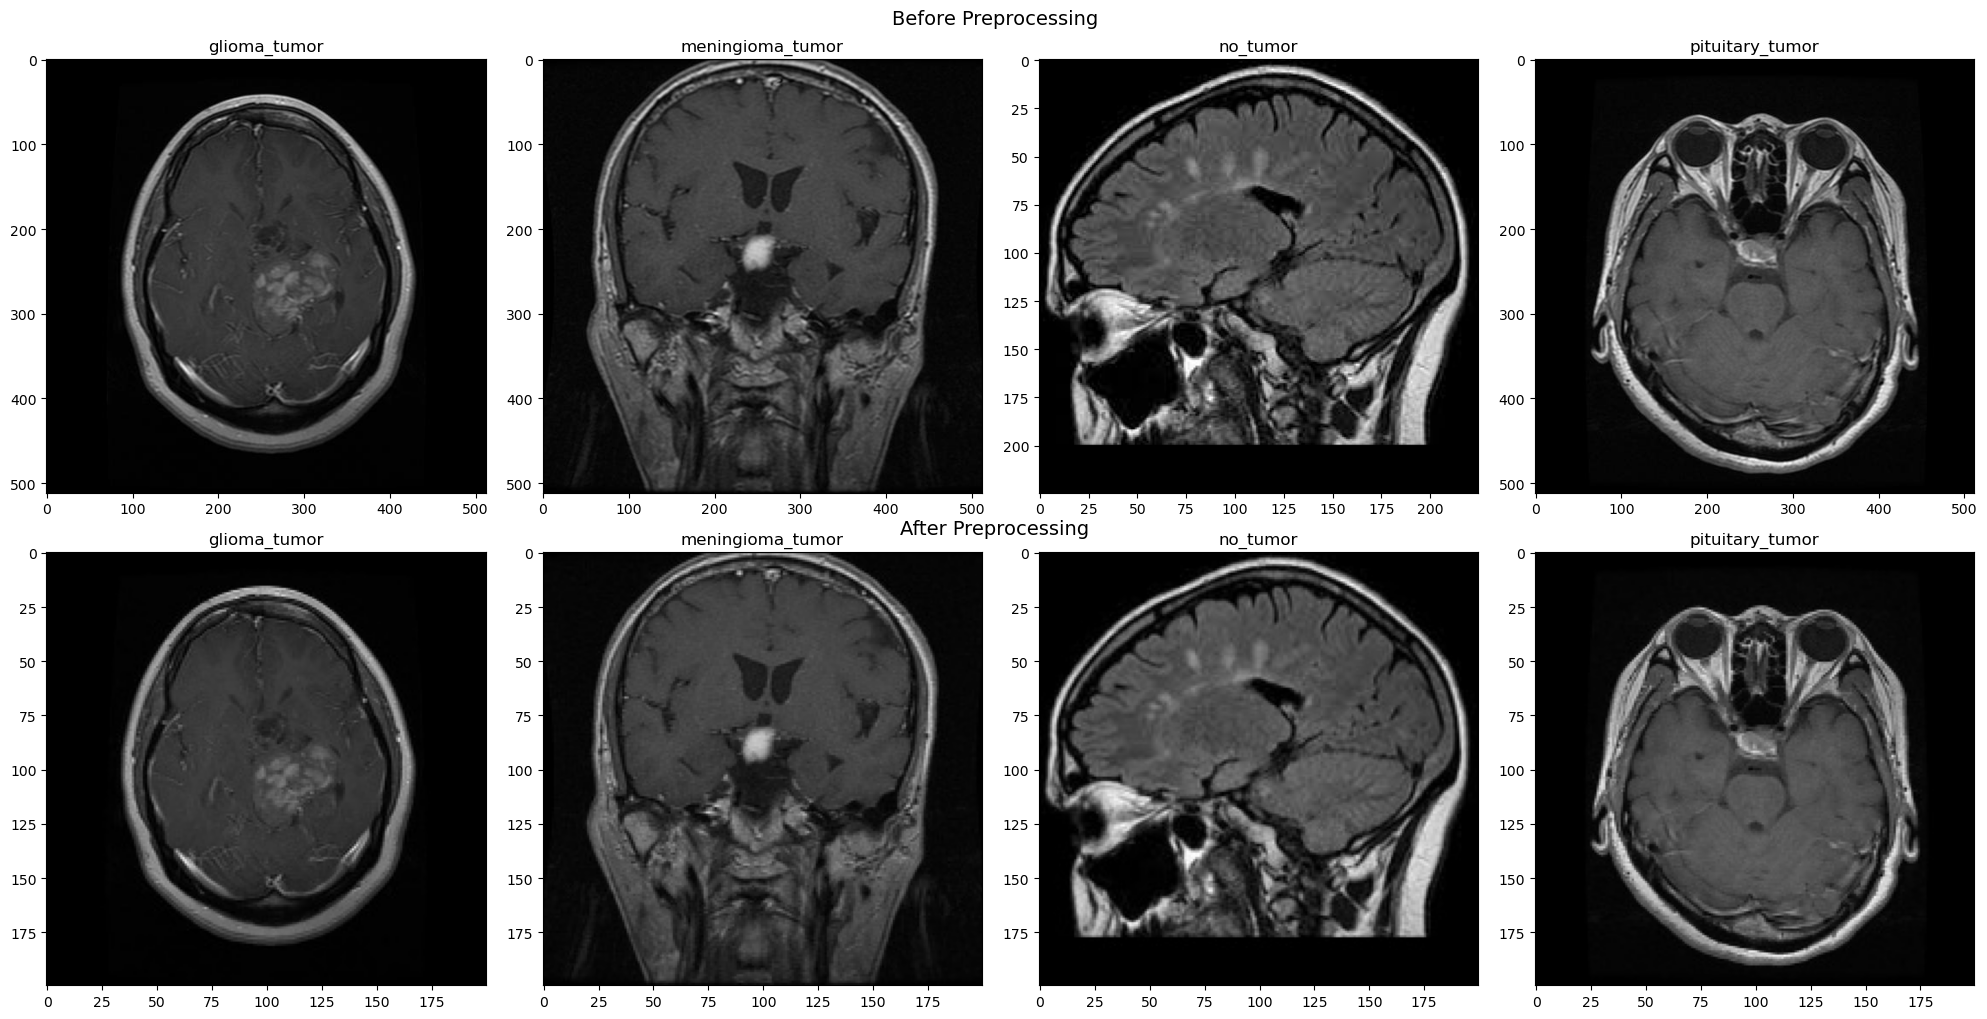

Images plotted successfully.


In [15]:
import os
import cv2
import matplotlib.pyplot as plt

before_dir = 'Before Preprocessing'
after_dir = 'After Preprocessing'


names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
def plotting_images(before_images, after_images, names):
    num_images = len(before_images)
    fig, axes = plt.subplots(2, num_images, figsize=(5*num_images, 10))
    fig.text(0.5, 1, 'Before Preprocessing', ha='center', fontsize=14)
    fig.text(0.5, 0.49, 'After Preprocessing', ha='center', fontsize=14)
    
    for i in range(num_images):
        # Read images
        img_before = cv2.imread(before_images[i])
        img_after = cv2.imread(after_images[i])
        
        # Plot images
        axes[0, i].imshow(cv2.cvtColor(img_before, cv2.COLOR_BGR2RGB))
        axes[0, i].set_title(f'{names[i]}')
        axes[0, i].set_aspect('auto')

        axes[1, i].imshow(cv2.cvtColor(img_after, cv2.COLOR_BGR2RGB))
        axes[1, i].set_title(f'{names[i]}')
        axes[1, i].set_aspect('auto')

    plt.tight_layout()
    plt.show()

# Collect paths of before and after images
before_images = []
after_images = []

for subdir in os.listdir(before_dir):
    input_subdir = os.path.join(before_dir, subdir)
    output_subdir = os.path.join(after_dir, subdir)
    
    if os.path.isdir(input_subdir) and os.path.isdir(output_subdir):
        for filename in os.listdir(input_subdir):
            image_before = os.path.join(input_subdir, filename)
            image_after = os.path.join(output_subdir, filename)
            
            if os.path.isfile(image_before) and os.path.isfile(image_after):
                before_images.append(image_before)
                after_images.append(image_after)

# Plot images before and after preprocessing
plotting_images(before_images, after_images, names)

print("Images plotted successfully.")


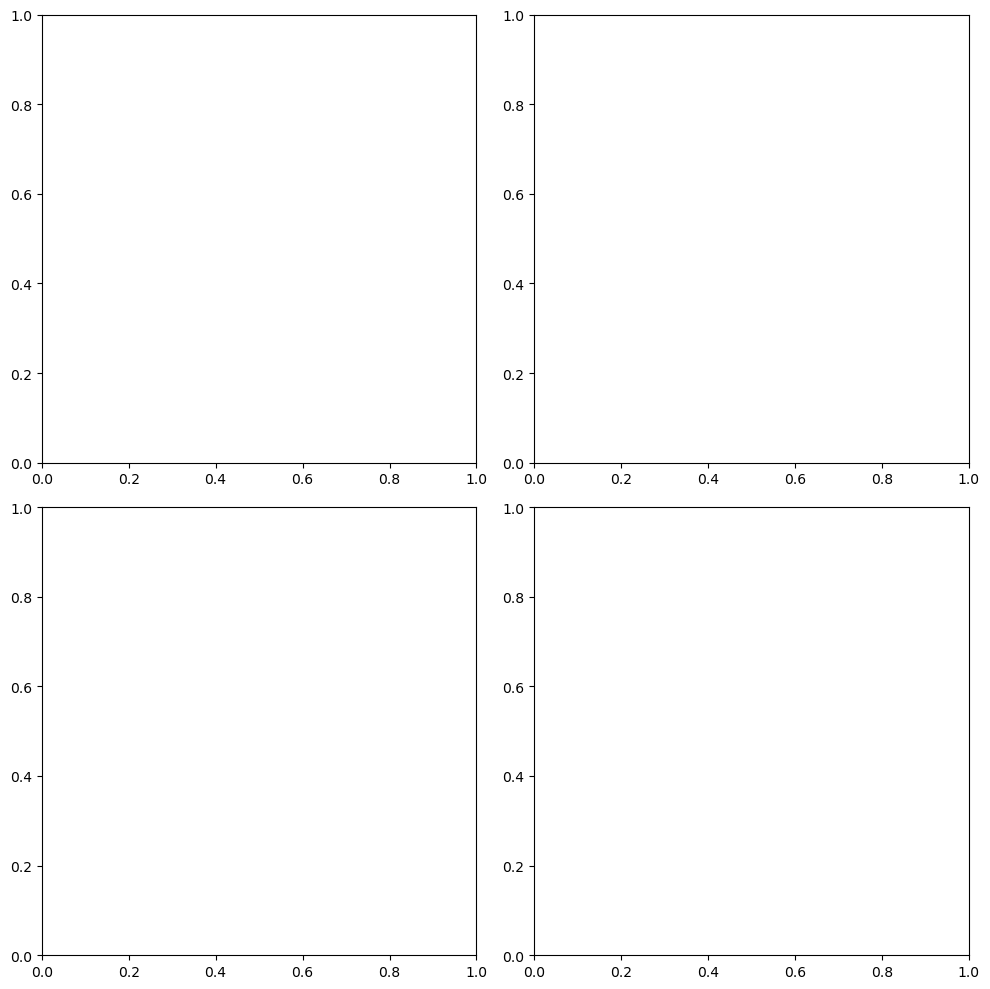

Images plotted successfully.


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Before Preprocessing\\glioma_tumor'

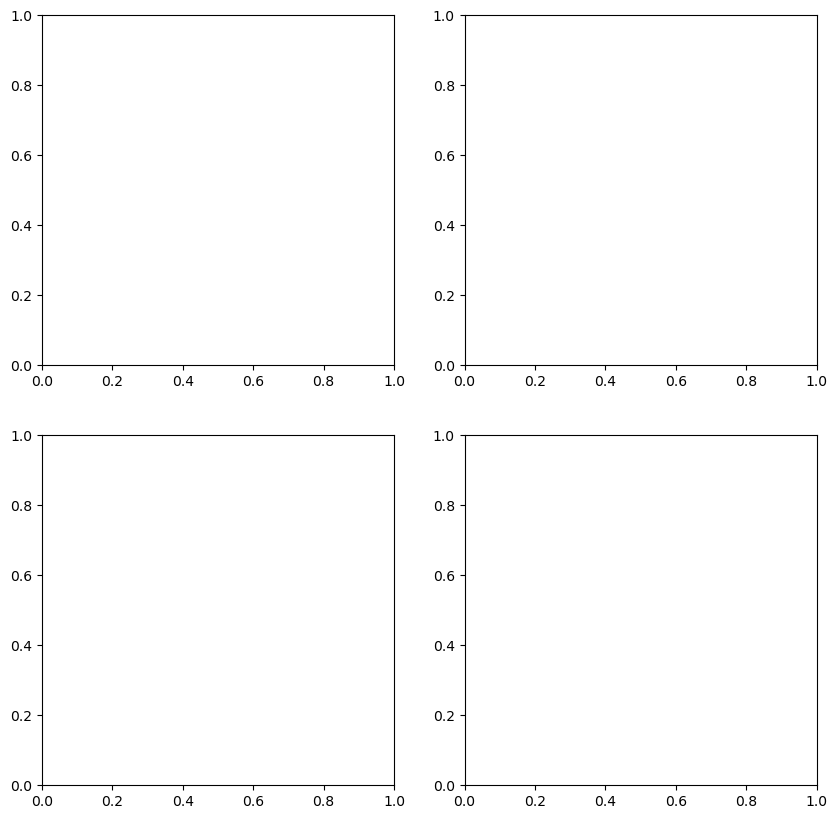